# <center>Movie Recommender System</center>
| Name |
|--------|
| Abhilash Dikshit|

We will be performing two types of recommendation systems.

- Content-Based Recommender System
- Collaborative Recommender System

Content-Based Recommender System and Collaborative Recommender System are two common approaches used in recommendation systems to suggest items (such as movies, products, or articles) to users based on their preferences and behavior. Here's an overview of each approach:

**1. Content-Based Recommender System:**
   - **How it works:** Content-based recommendation focuses on the characteristics of items and a user's profile to make recommendations. It suggests items similar to those the user has shown interest in, based on the content features of those items.
   - **Key Components:**
     - **User Profile:** A user profile is created based on the user's historical interactions or explicit preferences. For example, if the system is recommending movies, the user's profile may contain information about genres, actors, or directors they like.
     - **Item Profile:** Each item in the catalog is described by a set of content features. For movies, these features might include genre, director, cast, and plot keywords.
     - **Recommendation Process:** The system compares the user's profile with item profiles and recommends items that have content features similar to the user's preferences. For instance, if a user has shown a preference for action movies with certain actors,
    
**2. Collaborative Recommender System is an approach used in recommendation systems to provide personalized suggestions to users based on their past behavior and preferences. It relies on the idea that users who have shown similar preferences in the past will continue to do so in the future. There are two main types of collaborative recommender systems:**

1. **User-Based Collaborative Filtering:**
   - **How it works:** User-based collaborative filtering recommends items to a target user based on the preferences and behavior of users who are similar to that target user. It identifies users with similar tastes and suggests items that those similar users have liked but the target user has not yet interacted with.
   - **Process:**
     - Calculate similarity scores between users. Various similarity metrics can be used, such as cosine similarity or Pearson correlation.
     - Identify users who are most similar to the target user based on their behavior and preferences.
     - Recommend items that the similar users have liked but the target user has not interacted with.
   - **Pros:** It can provide accurate recommendations when there is sufficient user data.

2. **Item-Based Collaborative Filtering:**
   - **How it works:** Item-based collaborative filtering recommends items to a target user based on the similarity between items. It identifies items that are similar to those the target user has already interacted with and suggests those similar items.
   - **Process:**
     - Calculate similarity scores between items. Similarity metrics, such as cosine similarity or Jaccard index, can be used.
     - Identify items that are most similar to the ones the target user has already interacted with.
     - Recommend the most similar items that the user has not yet interacted with.
   - **Pros:** It can provide accurate recommendations and is often computationally efficient compared to user-based collaborative filtering.

LightFm package has a large set of datasets related to the movie rating. 

In [2]:
!pip install lightfm
!pip install numpy
!pip install scipy

In [3]:
import numpy as np
from lightfm.datasets import fetch_movielens
from lightfm import LightFM

/Users/abidikshit/opt/anaconda3/lib/python3.9/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


fetch_movielens method is used to fetch movie data with minimum rating of 3.0.

In [4]:
data = fetch_movielens(min_rating = 3.0)

In [6]:
display(data)

{'train': <943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 74627 stored elements in COOrdinate format>,
 'test': <943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 7893 stored elements in COOrdinate format>,
 'item_features': <1682x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 1682 stored elements in Compressed Sparse Row format>,
 'item_feature_labels': array(['T', 'G', 'F', ..., 'S', 'Y', 'S'], dtype='<U1'),
 'item_labels': array(['T', 'G', 'F', ..., 'S', 'Y', 'S'], dtype='<U1')}

In a supervised learning, we use a training dataset, that contains outcomes, to train the machine. 
We then use testing dataset that has no outcomes to predict outcomes.

In [8]:
print(repr(data['train']))
print(repr(data['test']))

<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 74627 stored elements in COOrdinate format>
<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 7893 stored elements in COOrdinate format>


Let's create a lightfm model with ‘warp’ loss function

In [10]:
model = LightFM(loss = 'warp')

We will train this model using our train data, with an epoch or iteration value of 30.

In [12]:
model.fit(data['train'], epochs=30, num_threads=2)

Take Input in the terminal to recommend movies for specific user ID.

Enter user ID:  15


User 15
     Known positives:
        T
        G
        T
     Recommended:
        R
        S
        S


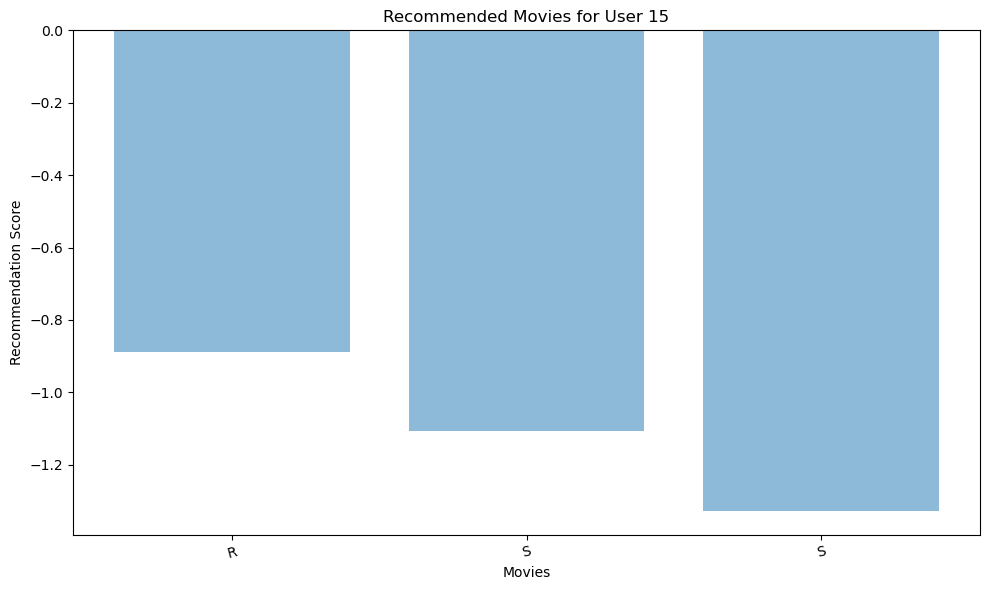

In [31]:
import matplotlib.pyplot as plt

def recommendation(model, data, user_id):
    n_users, n_items = data['train'].shape

    known_positives = data['item_labels'][data['train'].tocsr()[user_id].indices]

    scores = model.predict(user_id, np.arange(n_items))

    top_items = data['item_labels'][np.argsort(-scores)]
    
    print("User %s" % user_id)
    print("     Known positives:")
    
    for x in known_positives[:3]:
        print("        %s" % x)
    
    print("     Recommended:")
    
    for x in top_items[:3]:
        print("        %s" % x)

    # Create a bar chart to visualize recommendations
    plt.figure(figsize=(10, 6))
    plt.bar(range(3), scores[np.argsort(-scores)][:3], align='center', alpha=0.5)
    plt.xticks(range(3), top_items[:3], rotation=15)
    plt.xlabel('Movies')
    plt.ylabel('Recommendation Score')
    plt.title(f'Recommended Movies for User {user_id}')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    user_id = int(input("Enter user ID: "))  # Input the user ID from the terminal
    # Replace 'model', 'data', and 'user_id' with your actual recommendation model, data, and user ID
    recommendation(model, data, user_id)
